<a href="https://colab.research.google.com/github/Himika-Mishra/Dissertation/blob/main/Mnist_Type_2_(Case_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Type 2 (Case 1)

In [2]:
from sklearn.neural_network import MLPClassifier
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Filter images and labels for digits 0 to 6
mask_train = np.isin(y_train, [0, 1, 2, 3, 4, 5, 6])
X_train = X_train[mask_train]
y_train = y_train[mask_train]

# Reshape the images to 784-dimensional vectors
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255

# Create separate instances of OneHotEncoder for training and testing sets
encoder_train = OneHotEncoder(categories=[range(10)])
encoder_test = OneHotEncoder(categories=[range(10)])

# Fit the encoders on the respective datasets
encoder_train.fit(y_train.reshape((-1, 1)))
encoder_test.fit(y_test.reshape((-1, 1)))

# Transform the labels in the training set
y_train_encoded = encoder_train.transform(y_train.reshape((-1, 1))).toarray()

# Transform the labels in the testing set
y_test_encoded = encoder_test.transform(y_test.reshape((-1, 1))).toarray()

# Create an instance of the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,8), activation='relu', solver='adam', max_iter=500)

# Train the classifier on the training data
mlp.fit(X_train, y_train_encoded)

# Evaluate the classifier on the testing data
accuracy = mlp.score(X_test, y_test_encoded)
print(f"Accuracy with (0 to 6) labels on the training and testing with the original dataset: {accuracy}")

11490434/11490434 [==============================] - 0s 0us/step
Accuracy with (0 to 6) labels on the training and testing with the original dataset: 0.6596


In [3]:
# predictions
pred = mlp.predict(X_test)
print(confusion_matrix(y_test_encoded.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y_test_encoded.argmax(axis=1), pred.argmax(axis=1)))
print("--------------------------------------------------")

[[ 963    0    3    3    1    5    5    0    0    0]
 [   5 1120    3    1    0    3    3    0    0    0]
 [  35    5  957   15    8    4    8    0    0    0]
 [  24    3   11  950    2   18    2    0    0    0]
 [  17    5   16    4  920    4   16    0    0    0]
 [  34    2    0   22    8  818    8    0    0    0]
 [  23    3    5    1   16   13  897    0    0    0]
 [ 155   29  221  395   94  132    2    0    0    0]
 [ 229   55   67  250   80  276   17    0    0    0]
 [ 156   19   19  113  578  112   12    0    0    0]]
              precision    recall  f1-score   support

           0       0.59      0.98      0.73       980
           1       0.90      0.99      0.94      1135
           2       0.74      0.93      0.82      1032
           3       0.54      0.94      0.69      1010
           4       0.54      0.94      0.68       982
           5       0.59      0.92      0.72       892
           6       0.92      0.94      0.93       958
           7       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
# Initialize lists to store the ratio and F1 scores
ratios = [1]
f1_scores = []
classification_reports = []

In [5]:
# Calculate F1 score and store the ratio, F1 score, and classification report
f1 = f1_score(y_test_encoded.argmax(axis=1), pred.argmax(axis=1), average='weighted')
# ratios.append(ratio)
f1_scores.append(f1)
classification_reports.append(classification_report(y_test_encoded.argmax(axis=1), pred.argmax(axis=1), output_dict=True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import matplotlib.pyplot as plt

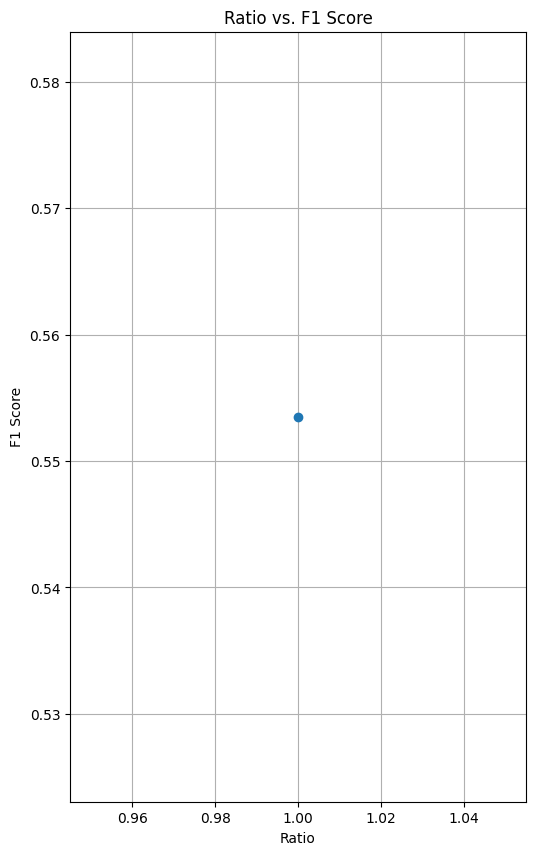

In [8]:
# Plot the ratio vs. F1 score
# plt.figure(figsize=(12, 4))
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.plot(ratios, f1_scores, marker='o')
plt.xlabel('Ratio')
plt.ylabel('F1 Score')
plt.title('Ratio vs. F1 Score')
plt.grid(True)